## `Pastikan klik 'File > Save a copy in Drive' sebelum memulai pengerjaan`

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.tseries.offsets import BDay

#Dataset

Data yang digunakan adalah data yang berasal dari Tokopedia (***bukan data sesungguhnya***). Mengenai penjelasan dataset adalah sebagai berikut:

|variable                       |class     |description |
|:------------------------------|:---------|:-----------|
**order_detail:**
id 			|object| angka unik dari order / id_order
customer_id 		|object|angka unik dari pelanggan
order_date 		|object| tanggal saat dilakukan transaksi
sku_id 			|object| angka unik dari produk (sku adalah stock keeping unit)
price			|int64| harga yang tertera pada tagging harga
qty_ordered 		|int64| jumlah barang yang dibeli oleh pelanggan
before_discount	|float64| nilai harga total dari produk (price * qty_ordered)
discount_amount	|float64| nilai diskon product total
after_discount		|float64| nilai harga total produk ketika sudah dikurangi dengan diskon
is_gross 		|int64| menunjukkan pelanggan belum membayar pesanan
is_valid		|int64| menunjukkan pelanggan sudah melakukan pembayaran
is_net			|int64| menunjukkan transaksi sudah selesai
payment_id 		|int64| angka unik dari metode pembayaran
||
**sku_detail:**
id |object| angka unik dari produk (dapat digunakan untuk key saat join)
sku_name 		|object| nama dari produk
base_price		|float64| harga barang yang tertera pada tagging harga / price
cogs 			|int64| cost of goods sold / total biaya untuk menjual 1 produk
category		|object| kategori produk
||
**customer_detail:**
id 			|object| angka unik dari pelanggan
registered_date	|object| tanggal pelanggan mulai mendaftarkan diri sebagai anggota
||
**payment_detail:**
id			|int64| angka unik dari metode pembayaran
payment_method	|object| metode pembayaran yang digunakan


In [2]:
def commas(x):
    if pd.isna(x):
        return x
    elif isinstance(x, float):
        return f"{x:,.2f}"
    elif isinstance(x, int):
        return f"{x:,}"
    else:
        return x

pd.set_option('display.max_columns', None)

## `Gathering Data`

In [3]:
order_df = pd.read_csv(r"D:\Documents\VScode\Data Analyst\Data Analyst\Dataset\Dataset - My Skill\order_detail.csv")
payment_df = pd.read_csv(r"D:\Documents\VScode\Data Analyst\Data Analyst\Dataset\Dataset - My Skill\payment_detail.csv")
customer_df = pd.read_csv(r"D:\Documents\VScode\Data Analyst\Data Analyst\Dataset\Dataset - My Skill\customer_detail.csv")
sku_df = pd.read_csv(r"D:\Documents\VScode\Data Analyst\Data Analyst\Dataset\Dataset - My Skill\sku_detail.csv")

In [4]:
merged_df = pd.merge(order_df, payment_df, left_on='payment_id', right_on='id', how='left', suffixes=('', '_payment'))
merged_df = pd.merge(merged_df, customer_df, left_on='customer_id', right_on='id', how='left', suffixes=('', '_customer'))
merged_df = pd.merge(merged_df, sku_df, left_on='sku_id', right_on='id', how='left', suffixes=('', '_sku'))

## `Data Cleaning and Manipulation`

In [5]:
merged_df = merged_df.drop(columns=['id_payment','id_sku','id_customer', 'base_price'], errors='ignore')

In [6]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5884 entries, 0 to 5883
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               5884 non-null   object 
 1   customer_id      5884 non-null   object 
 2   order_date       5884 non-null   object 
 3   sku_id           5884 non-null   object 
 4   price            5884 non-null   int64  
 5   qty_ordered      5884 non-null   int64  
 6   before_discount  5884 non-null   float64
 7   discount_amount  5884 non-null   float64
 8   after_discount   5884 non-null   float64
 9   is_gross         5884 non-null   int64  
 10  is_valid         5884 non-null   int64  
 11  is_net           5884 non-null   int64  
 12  payment_id       5884 non-null   int64  
 13  payment_method   5884 non-null   object 
 14  registered_date  5884 non-null   object 
 15  sku_name         5884 non-null   object 
 16  cogs             5884 non-null   int64  
 17  category      

### `Data type`

In [7]:
merged_df = merged_df.astype({"before_discount":'int', "discount_amount":'int', "after_discount":'int'})
merged_df[['order_date','registered_date']] = merged_df[
    ['order_date','registered_date']].apply(pd.to_datetime)

In [8]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5884 entries, 0 to 5883
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               5884 non-null   object        
 1   customer_id      5884 non-null   object        
 2   order_date       5884 non-null   datetime64[ns]
 3   sku_id           5884 non-null   object        
 4   price            5884 non-null   int64         
 5   qty_ordered      5884 non-null   int64         
 6   before_discount  5884 non-null   int64         
 7   discount_amount  5884 non-null   int64         
 8   after_discount   5884 non-null   int64         
 9   is_gross         5884 non-null   int64         
 10  is_valid         5884 non-null   int64         
 11  is_net           5884 non-null   int64         
 12  payment_id       5884 non-null   int64         
 13  payment_method   5884 non-null   object        
 14  registered_date  5884 non-null   datetim

### `Drup Duplicated`

In [9]:
merged_df.duplicated().sum()

np.int64(0)

### `Drop Null/NaN`

In [10]:
merged_df.isna().sum()

id                 0
customer_id        0
order_date         0
sku_id             0
price              0
qty_ordered        0
before_discount    0
discount_amount    0
after_discount     0
is_gross           0
is_valid           0
is_net             0
payment_id         0
payment_method     0
registered_date    0
sku_name           0
cogs               0
category           0
dtype: int64

### `Fix Unecessary Text`

In [11]:
merged_df[['sku_name']] = merged_df[['sku_name']].apply(lambda col: col.str.replace('_|-', ' ', regex=True))
merged_df.payment_method = merged_df.payment_method.replace({
    'cod': 'COD', 'Payaxis': 'Pay axis', 'Easypay':'Easy Pay',
    'customercredit': 'Customer Credit', 'ublcreditcard':'UBL Credit Card',
    'jazzwallet':'Jazz Wallet','mygateway': 'My Gateway', 'jazzvoucher': 'Jazz Voucher',
    'internetbanking':'Internet Banking', 'mcblite': 'MCB Lite', 'Easypay_MA':'Easy Pay MA',
    'easypay_voucher':'Easy Pay Voucher', 'cashatdoorstep': 'Cash at Door Step', 'productcredit':'Product Credit',
    'financesettlement': 'Finance Settlement', 'marketingexpense': 'Marketing Expense'})
merged_clean = merged_df.copy()

### `Export Data`

In [12]:
merged_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5884 entries, 0 to 5883
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               5884 non-null   object        
 1   customer_id      5884 non-null   object        
 2   order_date       5884 non-null   datetime64[ns]
 3   sku_id           5884 non-null   object        
 4   price            5884 non-null   int64         
 5   qty_ordered      5884 non-null   int64         
 6   before_discount  5884 non-null   int64         
 7   discount_amount  5884 non-null   int64         
 8   after_discount   5884 non-null   int64         
 9   is_gross         5884 non-null   int64         
 10  is_valid         5884 non-null   int64         
 11  is_net           5884 non-null   int64         
 12  payment_id       5884 non-null   int64         
 13  payment_method   5884 non-null   object        
 14  registered_date  5884 non-null   datetim

In [ ]:
# merged_clean.to_csv(r"D:\Documents\VScode\Data Analyst\Data Analyst\Proyek Real\MySkill - Proyek 2\merged_clean.csv", index=False)

## `No 1`
**Dear Data Analyst**,
<br></br>
Akhir tahun ini, perusahaan akan memberikan hadiah bagi pelanggan yang memenangkan kompetisi **Festival Akhir Tahun**. Tim Marketing membutuhkan bantuan untuk menentukan perkiraan hadiah yang akan diberikan pada pemenang kompetisi nantinya. Hadiah tersebut akan diambil dari **TOP 5 Produk** dari Kategori **Mobiles & Tablets** selama tahun 2022, dengan jumlah kuantitas penjualan (valid = 1) paling tinggi.

Mohon bantuan, untuk mengirimkan data tersebut sebelum akhir bulan ini ke Tim Marketing. Atas bantuan yang diberikan, kami mengucapkan terima kasih.
<br></br>
Regards

**Tim Marketing**

<details><summary>Klik di sini untuk tips</summary>


```python
1. Memfilter data dengan valid = 1
2. Memfilter data dengan Category = Mobiles & Tablets
3. Memfilter data pada transaksi selama 2022
4. Gunakan groupby berdasarkan sku_name
5. Gunakan sort_values untuk mengurutkan data
6. Gunakan head untuk menampilkan top 5 produk


```



</details>

## `Jawaban No 1`

In [ ]:
# Tulis kode Anda di bawah ini. Dapat menggunakan lebih dari 1 blok kode
merged_clean['year'] = merged_clean['order_date'].dt.year

top_5_qty = merged_clean[
    (merged_clean['year']==2022) &
    (merged_clean['is_valid']==1) &
    (merged_clean['category']=='Mobiles & Tablets')].\
        groupby(['year', 'sku_name']).agg(total_qty = ('qty_ordered', 'sum')
)
print('Top 5 Produk dari Category Mobiles & Tablets pada tahun 2022')
top_5_qty.reset_index().sort_values('total_qty', ascending=False).head(5)

Top 5 Produk dari Category Mobiles & Tablets pada tahun 2022


,year,sku_name,total_qty
1,2022,IDROID BALRX7 Gold,1000
2,2022,IDROID BALRX7 Jet black,31
3,2022,Infinix Hot 4 Gold,15
42,2022,samsung Grand Prime Plus Black,11
34,2022,infinix Zero 4 Grey,10


C:\Users\farid\AppData\Local\Temp\ipykernel_8660\3976182909.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sku_name', y='total_qty', data=top_5_qty_chart, palette="viridis").set_title('Top 5 Products by Quantity')


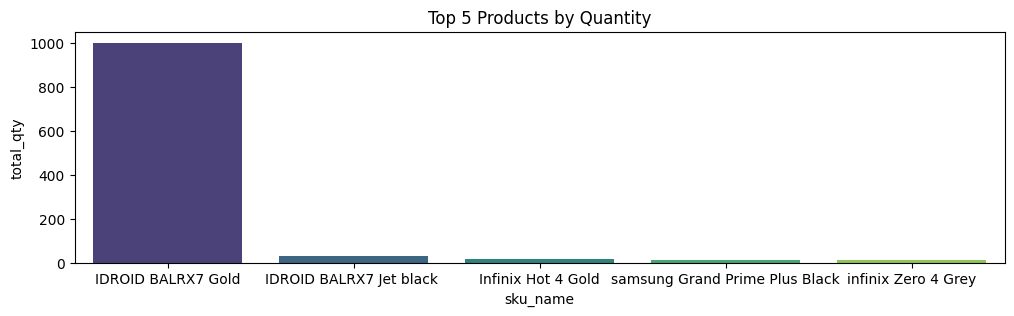

In [ ]:
top_5_qty_chart = top_5_qty.sort_values(by='total_qty', ascending=False).head(5)
plt.figure(figsize=(12, 3))
sns.barplot(x='sku_name', y='total_qty', data=top_5_qty_chart, palette="viridis").set_title('Top 5 Products by Quantity')
plt.show()

## `No 2`
**Dear Data Analyst**,
<br></br>
Menindaklanjuti meeting gabungan Tim Werehouse dan Tim Marketing, kami menemukan bahwa ketersediaan stock produk dengan Kategori Others pada akhir 2022 kemarin masih banyak.
1. Kami mohon bantuan untuk melakukan pengecekan data penjualan kategori tersebut dengan tahun 2021 secara kuantitas penjualan. Dugaan sementara kami, telah terjadi penurunan kuantitas penjualan pada 2022 dibandingkan 2021. (Mohon juga menampilkan data ke-15 kategori)
<br></br>
2. Apabila memang terjadi penurunan kuantitas penjualan pada kategori Others, kami mohon bantuan untuk menyediakan data TOP 20 nama produk yang mengalami penurunan paling tinggi pada 2022 jika dibanding dengan 2021. Hal ini kami gunakan sebagai bahan diskusi pada meeting selanjutnya.  

Mohon bantuan untuk mengirimkan data tersebut paling lambat 4 hari dari hari ini. Atas bantuan yang diberikan, kami mengucapkan terima kasih.
<br></br>
Regards

**Tim Werehouse**

<details><summary>Klik di sini untuk tips</summary>


```python
1. Memfilter data dengan valid = 1
2. Memfilter data pada transaksi selama 2021
3. Memfilter data pada transaksi selama 2022
4. Gunakan groupby berdasarkan sku_name masing-masing tahun
5. Menggabungkan kedua data dengan merge
6. Lakukan pengurangan kolom qty 2022 dengan qty 2021


```



</details>

## `Jawaban No 2.1`

In [ ]:
others_2021 = merged_clean[
    (merged_clean['is_valid']==1) &
    (merged_clean['year']==2021)].\
        groupby(['category']).agg(
            qty_2021 = ('qty_ordered', 'sum')
).reset_index()

others_2021.set_index(['category'])

,qty_2021
category,
Appliances,124
Beauty & Grooming,168
Books,171
Computing,109
Entertainment,77
Health & Sports,173
Home & Living,193
Kids & Baby,170
Men Fashion,237


In [ ]:
others_2022 = merged_clean[
    (merged_clean['is_valid']==1) &
    (merged_clean['year']==2022)].\
        groupby(['category']).agg(
            qty_2022 = ('qty_ordered', 'sum')
).reset_index()

others_2022.set_index(['category'])

,qty_2022
category,
Appliances,148
Beauty & Grooming,153
Books,195
Computing,153
Entertainment,150
Health & Sports,200
Home & Living,250
Kids & Baby,227
Men Fashion,175


In [ ]:
difference_cat = pd.merge(others_2021, others_2022, on='category', how='inner')
difference_cat['diff'] = difference_cat['qty_2022'] - difference_cat['qty_2021']

difference_cat['sort_order'] = difference_cat['category'].apply(lambda x: 0 if x == 'Others' else 1)
difference_cat = difference_cat.sort_values(['sort_order', 'diff'], ascending=[True, True])
difference_cat = difference_cat.drop(columns=['sort_order'])

print('Top 15 Categoty yang mengalami penurunan quantitas paling tinggi di 2021 dan 2022')
difference_cat.set_index('category').head(15)

Top 15 Categoty yang mengalami penurunan quantitas paling tinggi di 2021 dan 2022


,qty_2021,qty_2022,diff
category,,,
Others,426,263,-163
Soghaat,759,612,-147
Men Fashion,237,175,-62
Beauty & Grooming,168,153,-15
Appliances,124,148,24
Books,171,195,24
Health & Sports,173,200,27
Computing,109,153,44
School & Education,184,237,53


C:\Users\farid\AppData\Local\Temp\ipykernel_8660\2160829840.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='category', y='diff', data=difference_cat, palette=colors).set(title="Change in Quantity from 2021 to 2022")


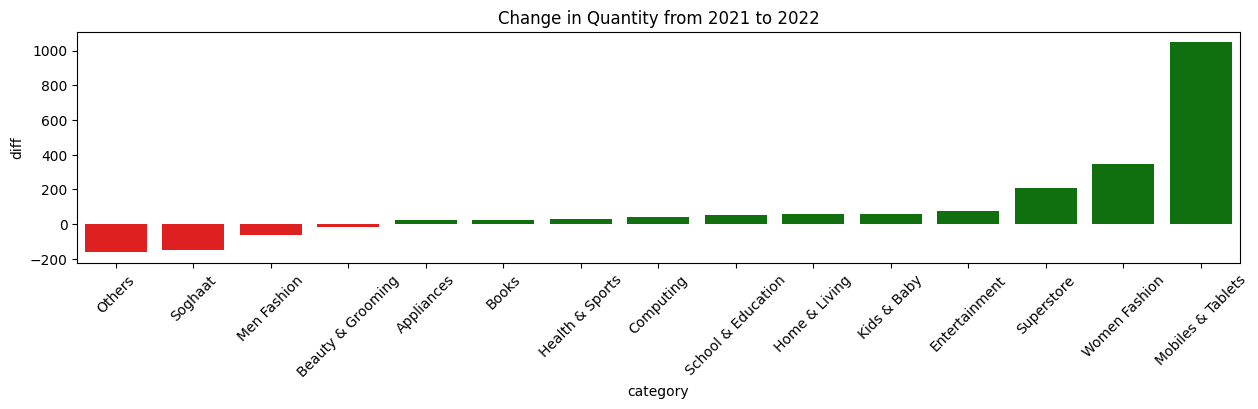

In [ ]:
colors = ['red' if x < 0 else 'green' for x in difference_cat['diff']]
plt.figure(figsize=(15, 3))
sns.barplot(x='category', y='diff', data=difference_cat, palette=colors).set(title="Change in Quantity from 2021 to 2022")
plt.xticks(rotation=45)
plt.show()

## `Jawaban No 2.2`

In [ ]:
others_minus_2021 = merged_clean[
    (merged_clean['is_valid']==1) &
    (merged_clean['year']==2021) &
    (merged_clean['category']=='Others')].\
        groupby(['sku_name']).agg(
            qty_2021 = ('qty_ordered', 'sum')
).reset_index()
others_minus_2021.sort_values(by=['qty_2021'], ascending=False).head(5)

,sku_name,qty_2021
39,RB Dettol Germ Busting Kit bf,200
43,Telemall MM DR HB L,23
10,Dawlance MD 10 + DWB 600,23
69,iu Tickets General Enclosure Islamabad,20
40,RS Rehmat e Shereen Mix Mithai,13


In [ ]:
others_minus_2022 = merged_clean[
    (merged_clean['is_valid']==1) &
    (merged_clean['year']==2022) &
    (merged_clean['category']=='Others')].\
        groupby(['sku_name']).agg(
            qty_2022 = ('qty_ordered', 'sum')
).reset_index()
others_minus_2022.sort_values(by=['qty_2022'], ascending=False).head(5)

,sku_name,qty_2022
37,RB Dettol Germ Busting Kit bf,45
82,emart Tyre Shape Air Compressor,34
43,SKMT Medicine,20
90,shoppers stop MagicGlass 3,13
47,TCF Educate a Child for a Month,8


In [ ]:
difference_sku = pd.merge(others_minus_2021, others_minus_2022, on='sku_name', how='inner')
difference_sku['diff'] = difference_sku['qty_2022'] - difference_sku['qty_2021']

difference_sku['sort_order'] = difference_sku['sku_name'].apply(lambda x: 0 if x == 'Others' else 1)
difference_sku = difference_sku.sort_values(['sort_order', 'diff'], ascending=[True, True])
difference_sku = difference_sku.drop(columns=['sort_order'])

print('Top 20 Produk kategory Others yang mengalami penurunan quantitas paling tinggi di 2021 dan 2022')
difference_sku.set_index('sku_name').head(20)

Top 20 Produk kategory Others yang mengalami penurunan quantitas paling tinggi di 2021 dan 2022


,qty_2021,qty_2022,diff
sku_name,,,
RB Dettol Germ Busting Kit bf,200,45,-155
Telemall MM DR HB L,23,2,-21
kansai NeverWet,10,1,-9
emart 00 1,7,1,-6
MEGUIAR G12711,4,1,-3
Aladdin bike cover,3,2,-1
Entertainer Asia Vouch 365 2017 Mobile App Lahore,2,1,-1
Tmall MM DR PAD,2,1,-1
aw Ultra Shine Wash & Wax 64oz./1893ml,2,1,-1


C:\Users\farid\AppData\Local\Temp\ipykernel_8660\2789635271.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='diff', y='sku_name', data=difference_sku, palette=colors).set(title="Change in Quantity from 2021 to 2022 by Category Others")


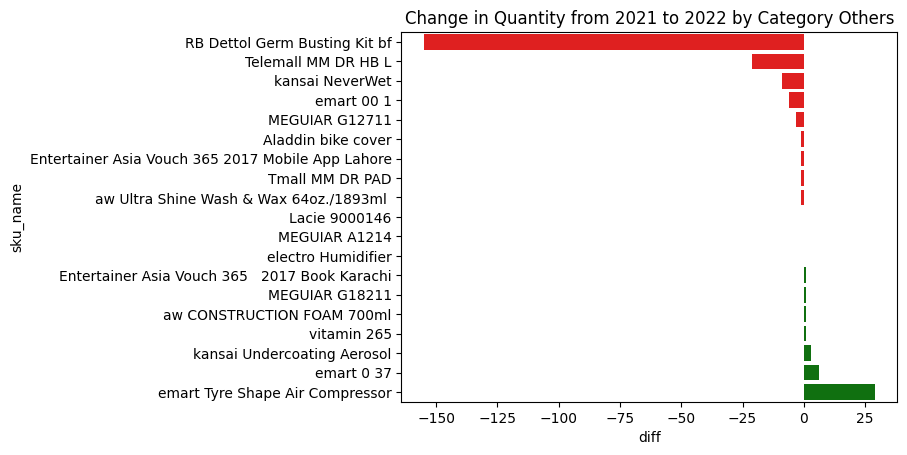

In [ ]:
colors = ['red' if x < 0 else 'green' for x in difference_sku['diff']]
sns.barplot(x='diff', y='sku_name', data=difference_sku, palette=colors).set(title="Change in Quantity from 2021 to 2022 by Category Others")
plt.show()

## `No 3`
**Dear Data Analyst**,
<br></br>
Terkait ulang tahun perusahaan pada 2 bulan mendatang, Tim Digital Marketing akan memberikan informasi promo bagi pelanggan pada akhir bulan ini. Kriteria pelanggan yang akan kami butuhkan adalah mereka yang sudah melakukan check-out namun belum melakukan pembayaran (is_gross = 1) selama tahun 2022. Data yang kami butuhkan adalah ID Customer dan Registered Date.

Mohon bantuan, untuk mengirimkan data tersebut sebelum akhir bulan ini ke Tim Digital Marketing. Atas bantuan yang diberikan, kami mengucapkan terima kasih.
<br></br>
Regards

**Tim Digital Marketing**

<details><summary>Klik di sini untuk tips</summary>


```python
1. Memfilter data dengan gross = 1
2. Memfilter data dengan valid = 0
3. Memfilter data dengan net = 0
4. Memfilter data pada transaksi selama 2022


```



</details>

## `Jawaban No 3`

In [ ]:
# Tulis kode Anda di bawah ini. Dapat menggunakan lebih dari 1 blok kode
promo = merged_clean[
    (merged_clean['year']==2022) &
    (merged_clean['is_gross']==1) &
    (merged_clean['is_valid']==0) &
    (merged_clean['is_net']==0)].\
        groupby(['customer_id', 'registered_date']).size().reset_index(name='count').drop(columns=['count'])
promo

,customer_id,registered_date
0,C107850L,2022-08-03
1,C110122L,2022-08-14
2,C114766L,2022-01-28
3,C115129L,2021-11-15
4,C115342L,2022-06-17
...,...,...
815,C995774L,2022-02-18
816,C995819L,2022-07-21
817,C998017L,2021-11-14
818,C998847L,2022-07-03


In [ ]:
promo = merged_clean[
    (merged_clean['registered_date'].dt.year == 2022) &
    (merged_clean['is_gross'] == 1) &
    (merged_clean['is_valid'] == 0) &
    (merged_clean['is_net'] == 0)
].groupby(['customer_id', 'registered_date']).size().reset_index(name='count').drop(columns=['count'])
promo

,customer_id,registered_date
0,C107850L,2022-08-03
1,C110122L,2022-08-14
2,C114766L,2022-01-28
3,C115342L,2022-06-17
4,C115470L,2022-06-11
...,...,...
620,C994467L,2022-03-15
621,C995583L,2022-03-02
622,C995774L,2022-02-18
623,C995819L,2022-07-21


In [ ]:
# #Jalankan kode ini untuk mendownload file
# from google.colab import files
# [nama variabel file].to_csv('audience_list.csv', encoding = 'utf-8-sig',index=False) #ganti [nama variabel file] dengan nama variabel yang digunakan
# files.download('audience_list.csv')

## `No 4`
**Dear Data Analyst**,
<br></br>
Pada bulan October hingga Desember 2022, kami melakukan campaign setiap hari Sabtu dan Minggu. Kami hendak menilai, apakah campaign tersebut cukup berdampak pada kenaikan penjualan (before_discount). Mohon bantuan untuk menampilkan data:
1. Rata-rata harian penjualan weekends (Sabtu dan Minggu) vs rata-rata harian penjualan weekdays (Senin-Jumat) per bulan tersebut. Apakah ada peningkatan penjualan pada masing-masing bulan tersebut.
2. Rata-rata harian penjualan weekends (Sabtu dan Minggu) vs rata-rata harian penjualan weekdays (Senin-Jumat) keseluruhan 3 bulan tersebut.

Mohon bantuan untuk mengirimkan data tersebut paling lambat minggu depan. Atas bantuan yang diberikan, kami mengucapkan terima kasih.
<br></br>
Regards

**Tim Campaign**

<details><summary>Klik di sini untuk tips</summary>


```python
1. Buatlah kolom baru untuk day, month, dan month number
2. Memfilter data dengan valid = 1
3. Memfilter data dengan day termasuk 'Saturday', 'Sunday' dengan menggunakan fungsi isin dan simpan dalam variable 'weekends'
4. Memfilter data dengan day termasuk 'Monday','Tuesday','Wednesday','Thusday','Friday' dengan menggunakan fungsi isin dan simpan dengan variabel 'weekday'
5. Memfilter data pada transaksi selama 2022 bulan Oktober sampai dengan Desember
6. Gunakan groupby berdasarkan pada masing-masing variabel
7. Menggabungkan kedua data dengan merge
8. Tampilkan pada grafik batang untuk melihat perbedaananya


```



</details>

## `Jawaban No 4.1`

In [ ]:
# Tulis kode Anda di bawah ini. Dapat menggunakan lebih dari 1 blok kode
merged_clean['month_name'] = merged_clean['order_date'].dt.month_name()
merged_clean['day'] = merged_clean['order_date'].dt.day_name()

campaign_weekend = merged_clean[
    (merged_clean['is_valid']==1) &
    (merged_clean['year']==2022) &
    (merged_clean['month_name'].isin(['October','November','December'])) &
    (merged_clean['day'].isin(['Saturday','Sunday']))].\
        groupby(['month_name']).agg(
            weekend_sales = ('before_discount','mean')
).reset_index().round(2).sort_values(by=['month_name'], ascending=False)

campaign_weekend.map(commas).set_index('month_name')

,weekend_sales
month_name,
October,"634,260.07"
November,"607,794.21"
December,"410,599.40"


In [ ]:
campaign_weekday = merged_clean[
    (merged_clean['is_valid']==1) &
    (merged_clean['year']==2022) &
    (merged_clean['month_name'].isin(['October','November','December'])) &
    ~(merged_clean['day'].isin(['Saturday','Sunday']))].\
        groupby(['month_name']).agg(
            weekday_sales = ('before_discount','mean')
).reset_index().round(2).sort_values(by=['month_name'], ascending=False)

campaign_weekday.map(commas).set_index('month_name')

,weekday_sales
month_name,
October,"874,690.27"
November,"641,862.00"
December,"813,574.29"


In [ ]:
campaign = pd.merge(campaign_weekday, campaign_weekend, on='month_name', how='inner')
campaign['diff'] = campaign['weekend_sales'] - campaign['weekday_sales']
campaign['percentage(%)'] = round(campaign['diff'] / campaign['weekday_sales'] * 100, 2)
campaign.set_index('month_name').map(commas)

,weekday_sales,weekend_sales,diff,percentage(%)
month_name,,,,
October,"874,690.27","634,260.07","-240,430.20",-27.49
November,"641,862.00","607,794.21","-34,067.79",-5.31
December,"813,574.29","410,599.40","-402,974.89",-49.53


In [ ]:
# Tulis kode Anda di bawah ini. Dapat menggunakan lebih dari 1 blok kode
merged_clean['month_name'] = merged_clean['order_date'].dt.month_name()
merged_clean['day'] = merged_clean['order_date'].dt.day_name()

campaign_base = merged_clean[
    (merged_clean['is_valid']==1) &
    (merged_clean['year']==2022) &
    (merged_clean['month_name'].isin(['October','November','December']))].\
        groupby(['month_name', merged_clean['day'].isin(['Saturday','Sunday'])]).agg(
            weekend_sales = ('before_discount','mean')
).reset_index().round(2).sort_values(by=['month_name'], ascending=False)

campaign_weekend = campaign_base[campaign_base['day'] == True]
campaign_weekend = campaign_weekend.drop(columns=['day'])
campaign_weekend.map(commas)

,month_name,weekend_sales
5,October,"634,260.07"
3,November,"607,794.21"
1,December,"410,599.40"


In [ ]:
campaign_weekday = campaign_base[campaign_base['day'] == False]
campaign_weekday = campaign_weekday.drop(columns=['day'])
campaign_weekday.rename(columns={'weekend_sales': 'weekday_sales'}, inplace=True)
campaign_weekday.map(commas)

,month_name,weekday_sales
4,October,"874,690.27"
2,November,"641,862.00"
0,December,"813,574.29"


In [ ]:
campaign = pd.merge(campaign_weekday, campaign_weekend, on='month_name', how='inner')
campaign['diff'] = round(campaign['weekday_sales'] - campaign['weekend_sales'], 2)
campaign['percentage(%)'] = round(campaign['diff'] / campaign['weekday_sales'] * 100, 2)
campaign.set_index('month_name').map(commas)

,weekday_sales,weekend_sales,diff,percentage(%)
month_name,,,,
October,"874,690.27","634,260.07","240,430.20",27.49
November,"641,862.00","607,794.21","34,067.79",5.31
December,"813,574.29","410,599.40","402,974.89",49.53


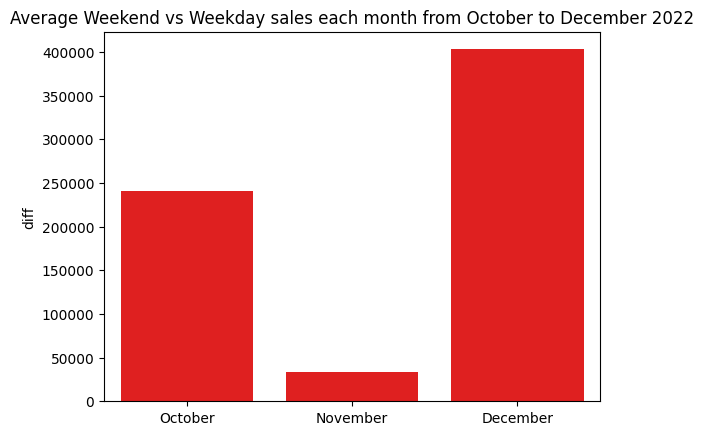

In [ ]:
sns.barplot(x=['October', 'November', 'December'], y='diff',data=campaign, color='red').set(title="Average Weekend vs Weekday sales each month from October to December 2022")
plt.show()

## `Jawaban No 4.2`

In [ ]:
campaign_overall = merged_clean[
    (merged_clean['is_valid']==1) &
    (merged_clean['year']==2022) &
    (merged_clean['month_name'].isin(['October','November','December']))].\
        groupby(~merged_clean['day'].isin(['Saturday','Sunday'])).agg(
            avg_overall_sales = ('before_discount','mean')
).round(2)

campaign_overall.index = ['Weekend', 'Weekday']
diff_avg_overall = campaign_overall.loc['Weekend','avg_overall_sales'] - campaign_overall.loc['Weekday','avg_overall_sales']
percentage_avg_overall = round(diff_avg_overall / campaign_overall.loc['Weekday','avg_overall_sales'] * 100,2)

new_row = pd.DataFrame({'avg_overall_sales': [diff_avg_overall]}, index=['Difference'])
new_row_2 = pd.DataFrame({'avg_overall_sales': [percentage_avg_overall]}, index=['Percentage(%)'])
campaign_overall = pd.concat([campaign_overall, new_row, new_row_2])

campaign_overall.map(commas)

,avg_overall_sales
Weekend,"558,865.15"
Weekday,"770,146.01"
Difference,"-211,280.86"
Percentage(%),-27.43


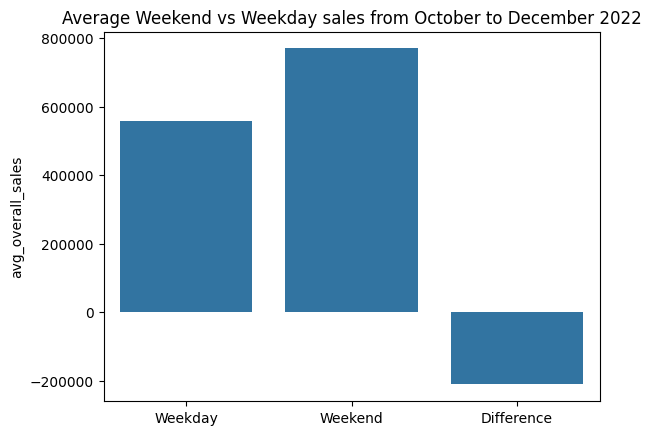

In [ ]:
campaign_overall_chart = campaign_overall.head(3)
sns.barplot(x=['Weekday', 'Weekend', 'Difference'], y='avg_overall_sales', data=campaign_overall_chart).set(title="Average Weekend vs Weekday sales from October to December 2022")
plt.show()